<a href="https://colab.research.google.com/github/BarnabasObuya/BanyTech/blob/master/Random_Forest_Classifier_using_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Classifier

- By Barnabas Obuya
- 06/12/2023

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


In [6]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
data.shape

(150, 5)

In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#visualize the data
px.scatter(data, x='sepal_width',
           y='sepal_length',
           color='species',
          size='petal_length',
          hover_data=['petal_width']
          )

In [12]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

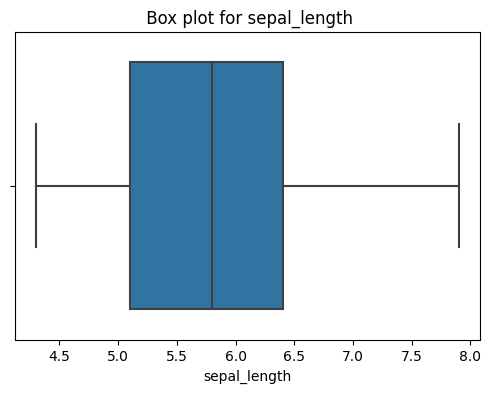

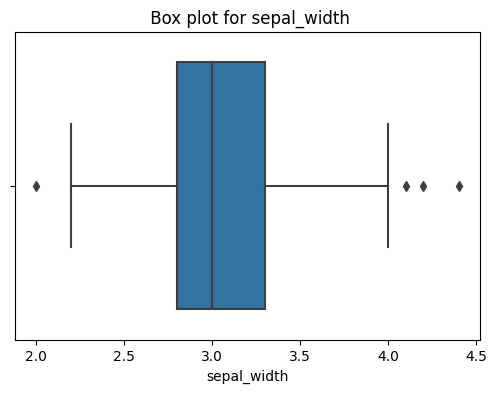

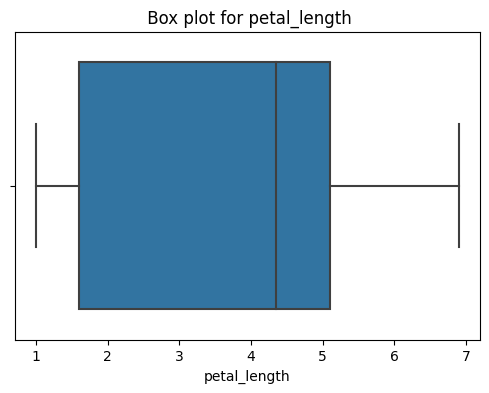

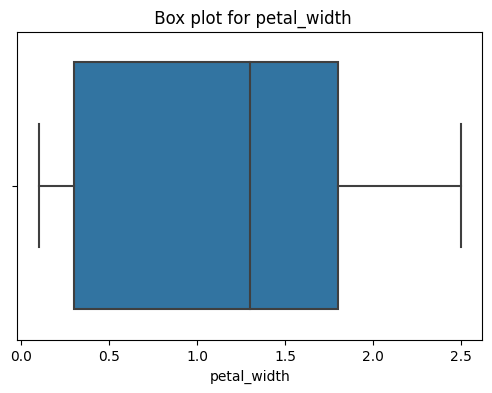

In [13]:
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=col)
    plt.title(f' Box plot for {col}')
    plt.show()

In [14]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
#Our taget feature is the species. So we will replace the species names with numbers ie 1,2,3
data['species'] = data['species'].map({'setosa':1, 'versicolor':2,'virginica':3})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [16]:
data['species'].unique()

array([1, 2, 3])

In [17]:
y=data['species']
x=data.drop(columns=['species'])

In [18]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=111)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


In [21]:
model.fit(x_train, y_train)
prediction=model.predict(x_test)
prediction

array([1, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 1, 3, 2, 3,
       2, 2, 3, 1, 1, 3, 1, 3])

In [22]:
y_test.array#our real data

<PandasArray>
[1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 2, 3, 2, 2, 3, 1,
 1, 2, 1, 3]
Length: 30, dtype: int64

In [23]:
#lets compare our actual species and the predicted species
pd.DataFrame({'Actual':y_test, 'Predicted':prediction})

,Actual,Predicted
39,1,1
26,1,1
109,3,3
123,3,3
77,2,3
24,1,1
0,1,1
139,3,3
144,3,3
56,2,2


In [24]:
#Evaluate the performance of our model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score=accuracy_score(y_test,prediction)
report=classification_report(y_test,prediction)
matrix=confusion_matrix(y_test,prediction)
print(f'The Accuracy Score = {score}')
print('................................')
print(f'The Classification Report is shown below\n {report}')
print('................................')
print(f'The Confusion Matrix is shown below {matrix}')


The Accuracy Score = 0.9
................................
The Classification Report is shown below
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.83      0.71      0.77         7
           3       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30

................................
The Confusion Matrix is shown below [[10  0  0]
 [ 0  5  2]
 [ 0  1 12]]


In [25]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [26]:
#Make a prediction based on entries

sepal_length           = float(input('Enter the sepal lenght : '))
sepal_width            = float(input('Enter the sepal widht : '))
petal_length           = float(input('Enter the petal lenght : '))
petal_width            = float(input('Enter the petal widht : '))

inputs   = [sepal_length,sepal_width , petal_length,petal_width ]
columns_name =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
dict_ = dict(zip(columns_name, inputs))
new_data = pd.DataFrame([dict_])
prediction = model.predict(new_data)

print('The Inputs Were as Follows:',inputs)
print('-------------------------------------------------')
print('The Prediction is :',prediction[0])
if prediction[0]==1:
  print('The species is setosa')
if prediction[0]==2:
  print('The species is versicolor')
elif prediction[0]==3:
  print('The species is virginica')

Enter the sepal lenght : 5.7
Enter the sepal widht : 7.9
Enter the petal lenght : 10.6
Enter the petal widht : 6
The Inputs Were as Follows: [5.7, 7.9, 10.6, 6.0]
-------------------------------------------------
The Prediction is : 3
The species is virginica


In [27]:
# Check if the model has overfit
y_pred_on_train    = model.predict(x_train)  # Seen
train_score       = accuracy_score(y_train , y_pred_on_train)


print(f'Train accuracy : {train_score}\n\nTest accuracy {score}')

Train accuracy : 1.0

Test accuracy 0.9


<Axes: xlabel='Importance', ylabel='Features'>

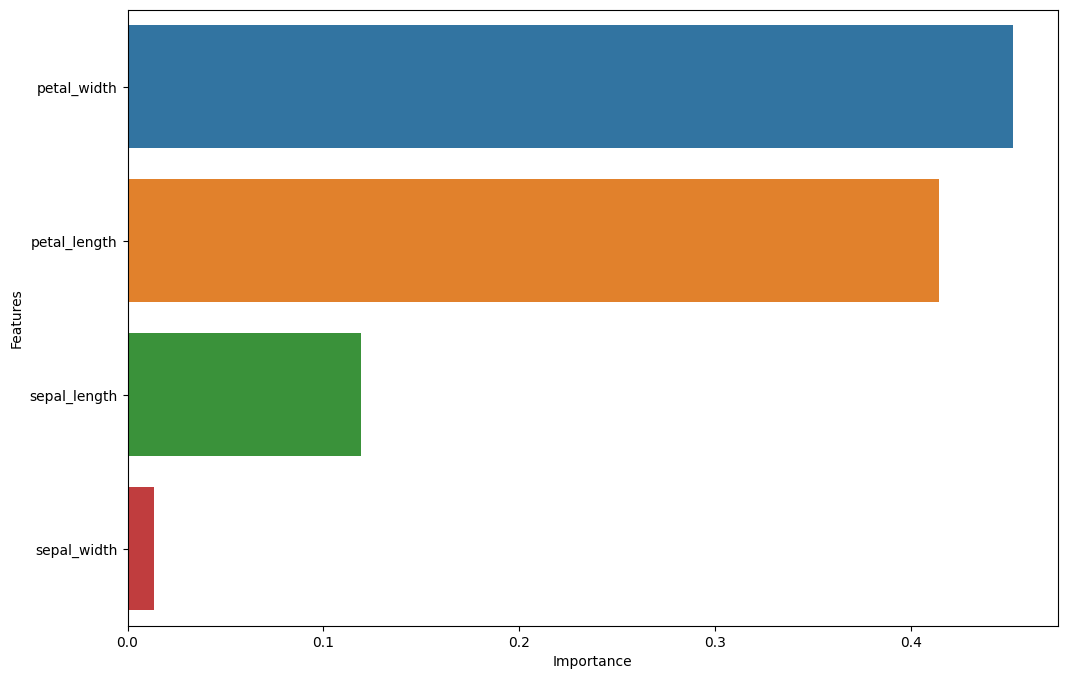

In [28]:
#Check for the important features used in the model

model.feature_importances_

feature_impo_df = pd.DataFrame({'Features':x.columns, 'Importance':model.feature_importances_})
feature_impo_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_impo_df

plt.figure(figsize=(12,8))
sns.barplot(data=feature_impo_df, y='Features',x='Importance' )